# <u>Heart Disease Prediction Analysis</u>

## First we will import all the necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Then we will import the dataset which is in .csv format.

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Data Cleaning

### 1.Checking for null values in the dataset.

In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### 2.Checking for duplicate values in the dataset.

In [5]:
df.duplicated().sum()

0

## Exploratory Data Analysis

### 1.Analysing shape of our dataset. (No. of rows & columns)

In [6]:
df.shape

(918, 12)

### 2.Analysing the structure of our dataset. (Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### 3.Get overall statistics of the dataset.

In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### 4.How many people have heart disease in this dataset?

In [9]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

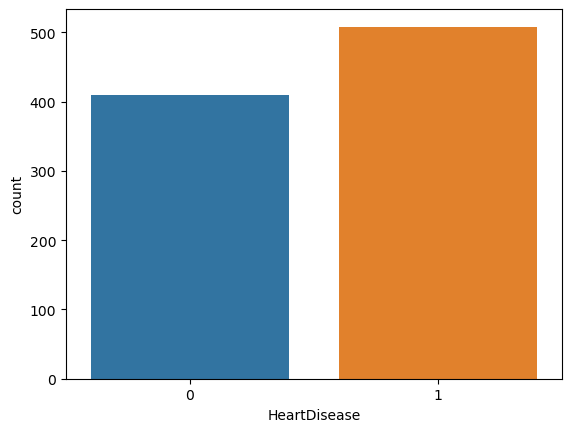

In [10]:
# We can show this by bar graph.

sns.countplot(x = 'HeartDisease' , data = df)

### 5.What is the count of male and females in this dataset?

In [11]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

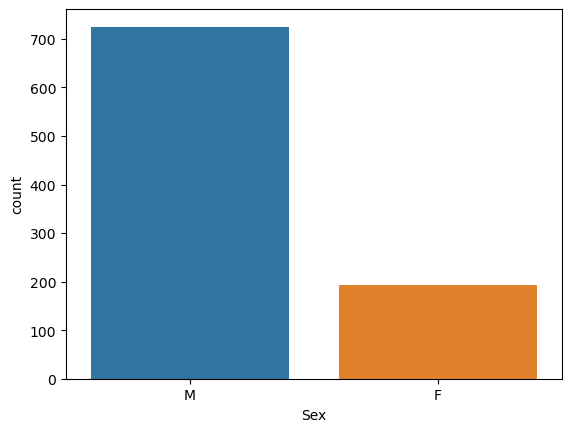

In [12]:
# We can show this by bar graph.

sns.countplot(x = 'Sex', data = df)

### 6.Find gender distribution according to the heart disease variable.

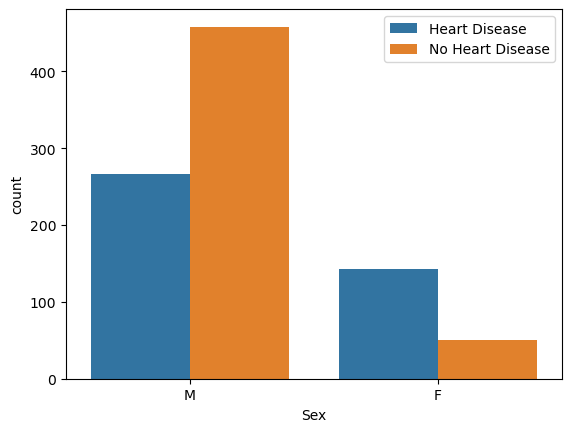

In [13]:
sns.countplot(x = 'Sex', hue = "HeartDisease", data = df)
plt.legend(labels = ['Heart Disease', 'No Heart Disease'])

### 7.Check for age distribution in the dataset.

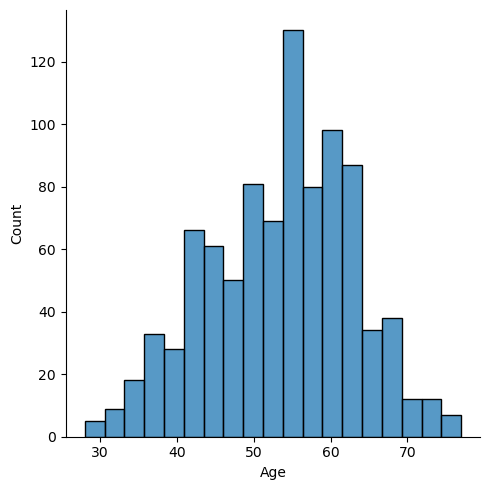

In [14]:
# We can show this by Distribution Plot.

sns.displot(df['Age'])

### 8.Check for Resting Blood Pressure range distribution in this dataset.

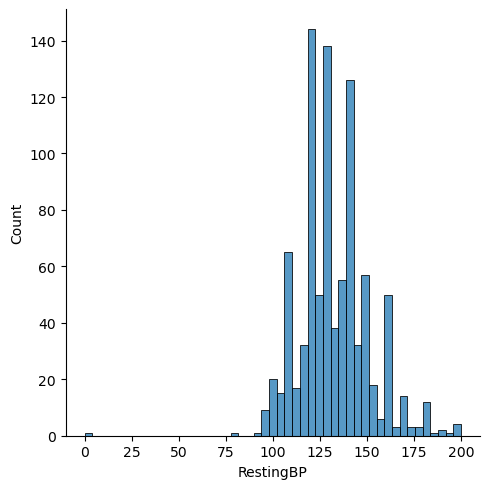

In [15]:
sns.displot(df['RestingBP'])

### 9.Compare Resting Blood Pressure As Per Sex Column.

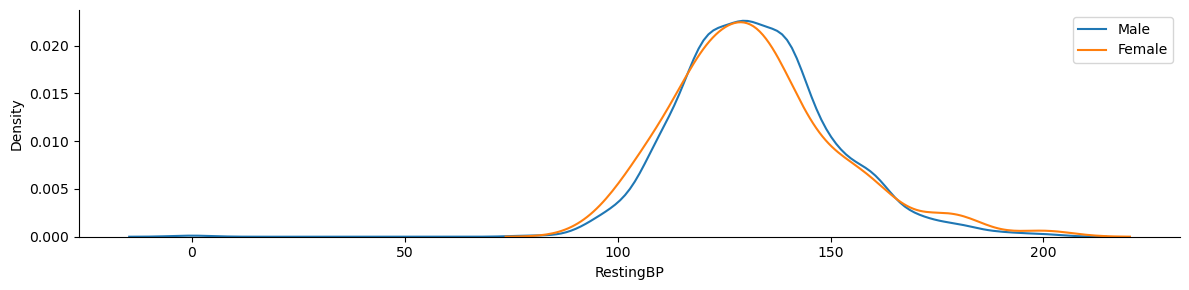

In [16]:
a = sns.FacetGrid(df, hue = 'Sex', aspect = 4)
a.map(sns.kdeplot, 'RestingBP')
plt.legend(labels = ['Male', 'Female'])

### 10.Does High Resting Blood Pressure increases chances of having Heart Disease?

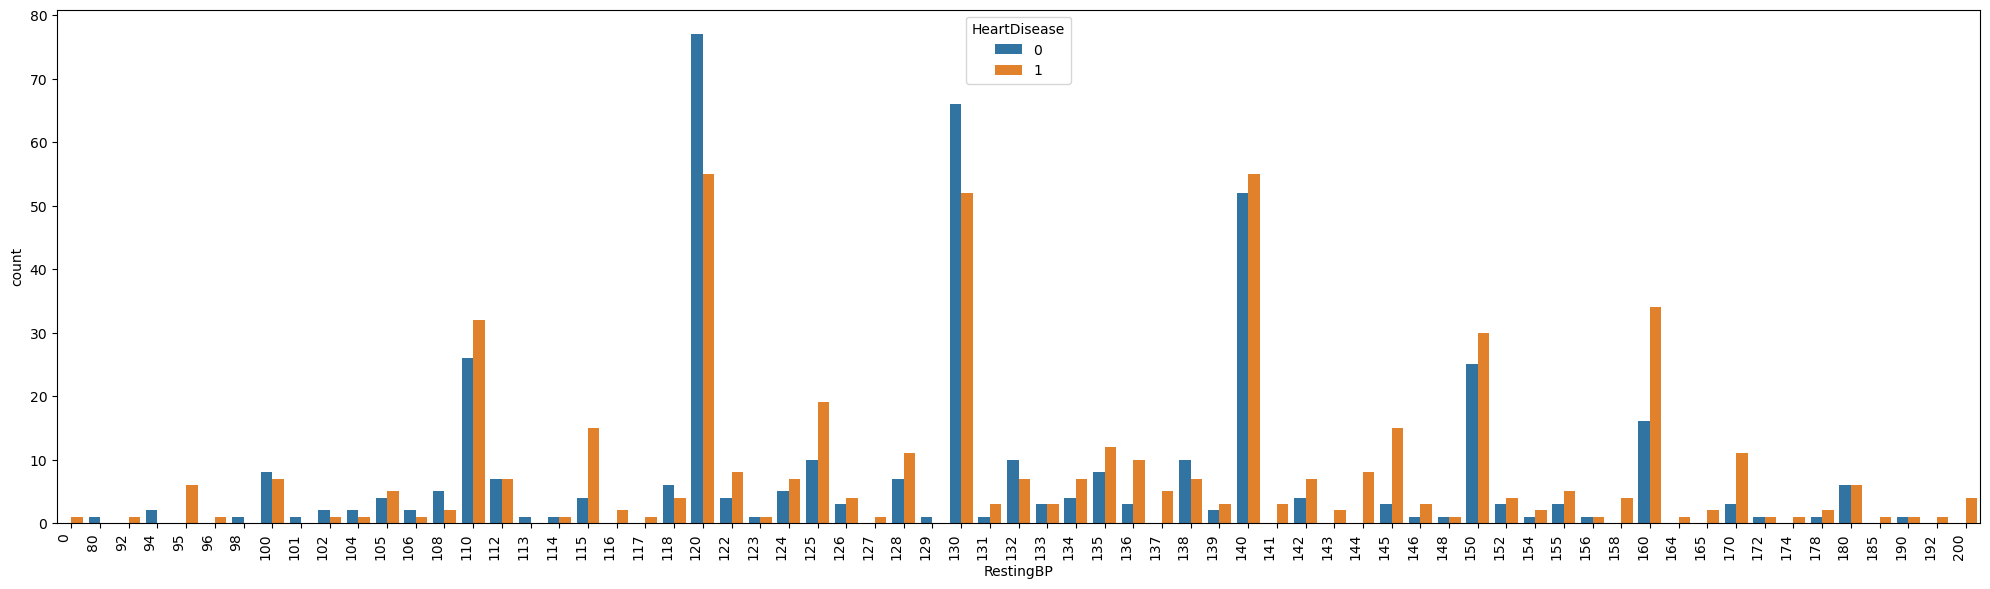

In [17]:
plt.figure(figsize=(20,6))
ax = sns.countplot(x = 'RestingBP', hue = 'HeartDisease', data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

### 11.How many people in this dataset have high Fasting Blood Sugar?

In [18]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

<AxesSubplot:xlabel='FastingBS', ylabel='count'>

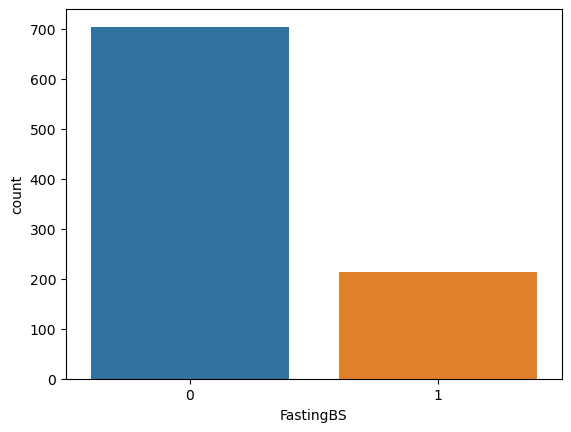

In [19]:
# We can show this by bar graph.

sns.countplot(x = 'FastingBS', data = df)

### 12.Show Fasting Blood Sugar Distribution According To Heart Disease Variable.

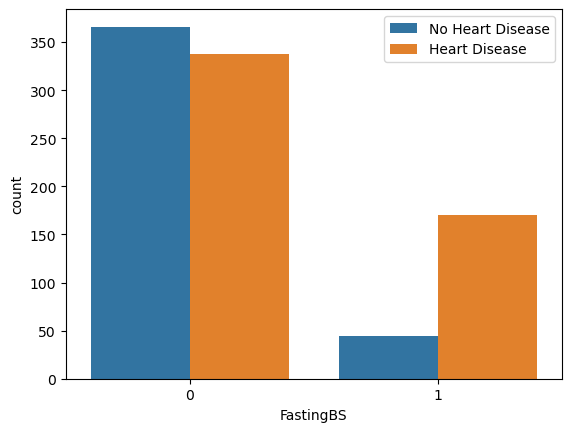

In [20]:
sns.countplot(x = 'FastingBS', hue = 'HeartDisease', data = df)
plt.legend(labels=['No Heart Disease', 'Heart Disease'])

### 13.Check Chest Pain Type.

In [21]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

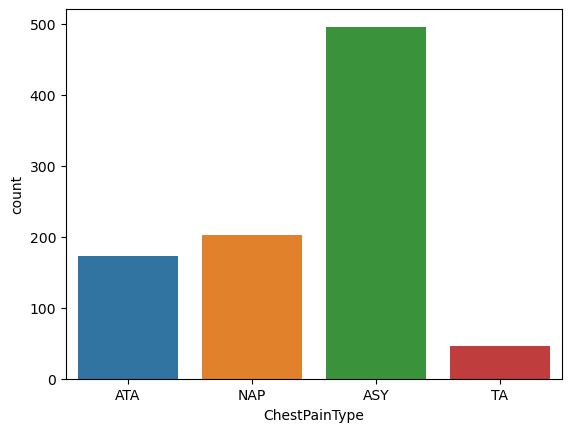

In [22]:
sns.countplot(x = 'ChestPainType', data = df)

### 14.Check Chest Pain according to the Heart Disease variable.

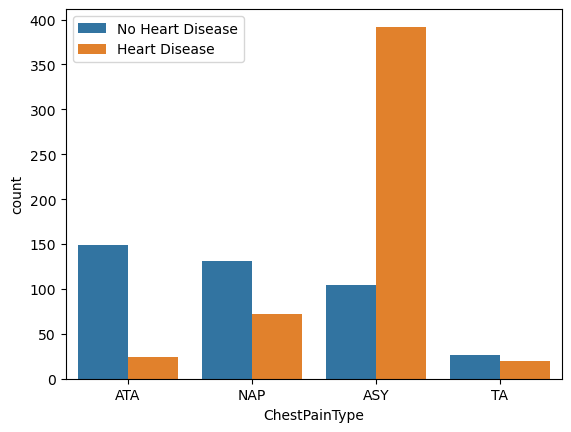

In [23]:
sns.countplot(x = 'ChestPainType', hue = 'HeartDisease', data = df)
plt.legend(labels = ['No Heart Disease', 'Heart Disease'])

### 15.Show Distribution of Serum cholesterol.

<AxesSubplot:>

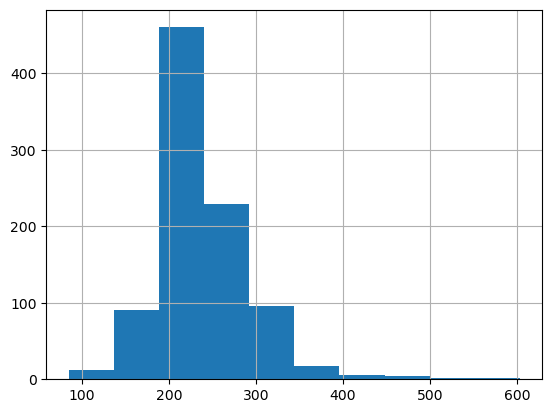

In [30]:
df['Cholesterol'].hist()

### 16.What is the most common Maximum Heart Rate in this dataset?


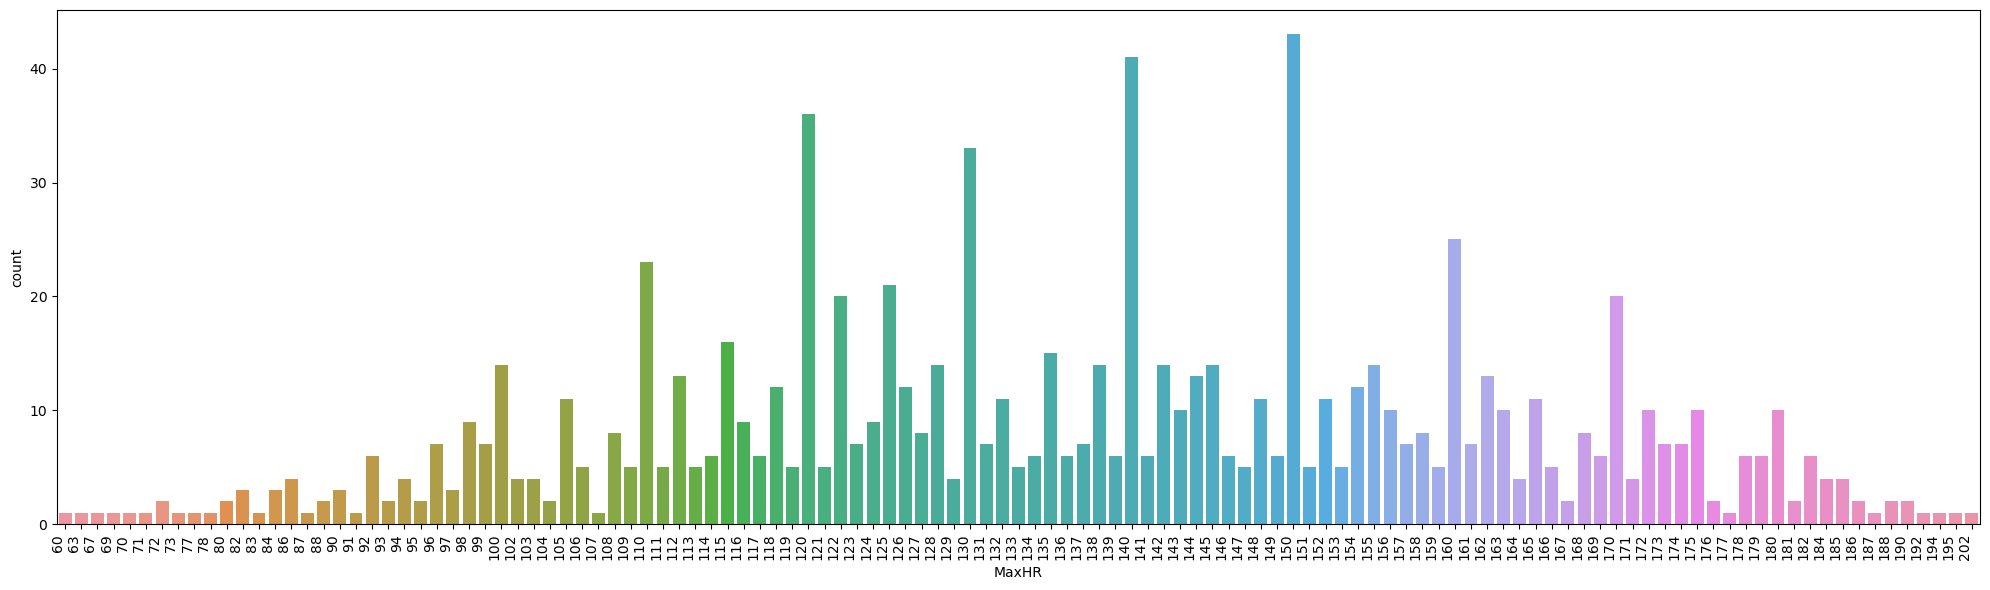

In [25]:
plt.figure(figsize=(20,6))
ax = sns.countplot(x = 'MaxHR', data = df )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

### 17.Show Resting ECG according to the Heart Disease variable.

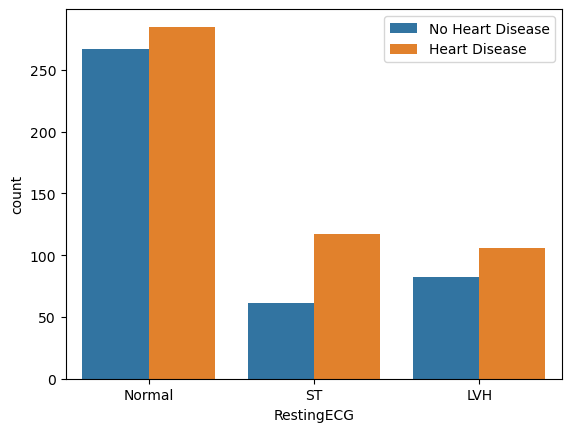

In [26]:
sns.countplot(x = 'RestingECG', hue = 'HeartDisease', data = df)
plt.legend(labels = ['No Heart Disease', 'Heart Disease'])

### 18.Can Exercise Induced Angina be a symptom of Heart Disease?

<AxesSubplot:xlabel='ExerciseAngina', ylabel='count'>

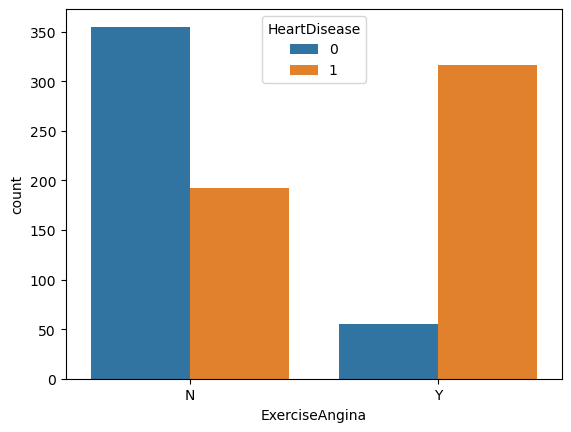

In [27]:
sns.countplot(x = 'ExerciseAngina', hue = 'HeartDisease', data = df)

# Conclusion
## From the above analysis we can conclude the following points:-

### 1.Heart Diseases are more common in males than females.
### 2.Age 50-60s are usually when heart diseases happen.
### 3.Resting blood pressure most commonly ranges from 120-150.
### 4.Females usually have lower resting blood pressures than males.
### 5.Resting blood pressure higher than 120 can contribute to heart disease.
### 6.Most people who have heart disease usually have no chest pain.
### 7.Having high fasting blood sugar can increase the chances of having heart disease.
### 8.Average serum cholesterol levels ranges between 200-300.
### 9.Maximum heart rate in most people ranges around 150.
### 10.You can have perfectly normal resting ECG yet still have heart disease.
### 11.Exercise induced angina can be a good symptom of heart disease.